# Project 1: Linkedin Job Postings

By: María de los Ángeles Amú Moreno & Emmanuel Quintero Palma 

During these project, we will address the specified requirements and present diagrams and visualizations to elucidate the solutions. Our approach involves employing SQLAlchemy as an Object-Relational Mapping (ORM) tool connected to PostgreSQL, and we will generate visual representations using PowerBI.

## Section #1: Import the modules, make the connection to the database, and load the data into it.

Here, we are importing the modules:

In [1]:
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR, DateTime
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker, declarative_base
import json
import matplotlib.pyplot as plt
import pandas as pd
import os

Next, we created the database credentials called "keys.json", and contains the user, password, port, server & database name, to make the connection with the database

In [2]:
file_path = '../Credentials/keys_e.json'
if os.path.exists(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        user = data["user"]
        password = data["password"]
        port = data["port"]
        server = data["server"]
        db = data["db"]
else:
    print(f"File '{file_path}' not found.")
db_connection = f"postgresql://{user}:{password}@{server}:{port}/{db}"
engine = create_engine(db_connection)
print(f"connected!")

connected!


This message confirms that the connection to the database was made correctly. To later create the table "jobsLinkedin" with the required columns.

### JobsLinkedin Table

In [3]:
Session = sessionmaker(bind=engine)
session = Session()

In [4]:
Base = declarative_base()

class Jobs(Base):
    __tablename__ = 'jobsLinkedin'
    id = Column(Integer, primary_key=True, autoincrement=True)
    job_id = Column(Integer, nullable=False)
    company_id = Column(String(100), nullable=False)
    title = Column(String(100), nullable=False)
    description = Column(String(200), nullable=False)
    max_salary = Column(Integer, nullable=False)
    med_salary = Column(Integer, nullable=False)
    min_salary = Column(Integer, nullable=False)
    pay_period = Column(String(100), nullable=False)
    formatted_work_type = Column(String(100), nullable=False)
    location = Column(String(100), nullable=False)
    applies = Column(Integer, nullable=False)
    original_listed_time = Column(Date, nullable=False)
    remote_allowed = Column(Boolean, nullable=False)
    views = Column(Integer, nullable=False)
    job_posting_url = Column(String(100), nullable=False)
    application_url = Column(String(100), nullable=False)
    application_type = Column(String(100), nullable=False)
    expiry = Column(Date, nullable=False)    
    closed_time = Column(Date, nullable=False)
    formatted_experience_level = Column(String(100), nullable=False)
    skills_desc = Column(String(100), nullable=False)
    listed_time = Column(DateTime, nullable=False)
    posting_domain = Column(String(100), nullable=False)
    sponsored = Column(Boolean, nullable=False)
    work_type = Column(String(100), nullable=False)
    currency = Column(CHAR(3), nullable=False)
    compensation_type = Column(String(100), nullable=False)
    scraped = Column(Integer, nullable=False)

Base.metadata.create_all(engine)
Jobs.__table__

print("Table created")

Table created


Next, we can see that the table was created successfully in PostgreSQL:

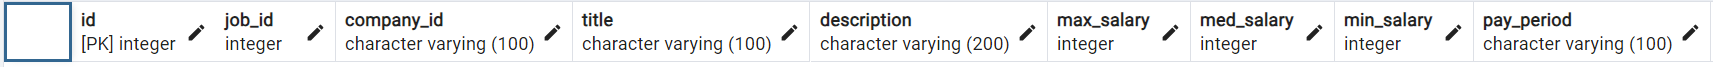

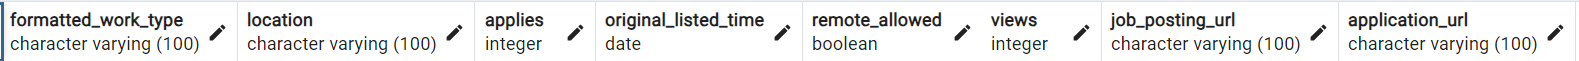

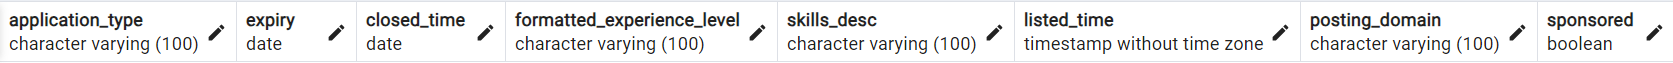

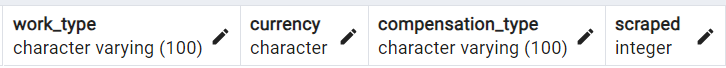

We will also work with two other tables called "Industries", which contains key information about the "id" of the industries and their respective names; and the other is "jobIndustries" which contains "job_id" and "industry_id". We do this to expand a bit the analysis we want to perform.

### Industries Table

In [5]:
Base = declarative_base()

class Industries(Base):
    __tablename__ = 'Industries'
    id = Column(Integer, primary_key=True, autoincrement=True)
    industry_id = Column(Integer, nullable=False)
    industry_name = Column(String(100), nullable=False)

Base.metadata.create_all(engine)
Industries.__table__
print("Table created")

Table created


Next, we can see that the table was created successfully:

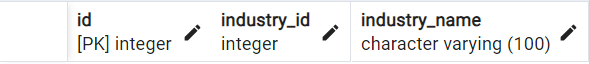

### Table JobsIndustries

In [6]:
Base = declarative_base()

class JobsIndustries(Base):
    __tablename__ = 'JobsIndustries'
    id = Column(Integer, primary_key=True, autoincrement=True)
    job_id = Column(Integer, nullable=False)
    industry_id = Column(Integer, nullable=False)

Base.metadata.create_all(engine)
JobsIndustries.__table__

print("Table created")

Table created


Next, we can see that the table was created succesfully:

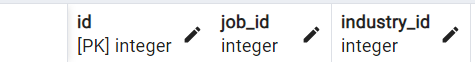

We upload the data in postgreSql:

In [7]:
class File:
    def __init__(self, file):
        self.df = pd.read_excel(file, engine='openpyxl')

### Insert to jobsLinkedin table

In [8]:
file_path = '../Data/job_postulations.xlsx'
if os.path.exists(file_path):
    data = File(file_path)
    data.df.to_sql('jobsLinkedin', engine, if_exists='replace', index=False)
    print("Data inserted")
else:
    print(f"File '{file_path}' not found.")

Data inserted


### Insert to Industries

In [9]:
file_path = '../Data/industries.xlsx'
if os.path.exists(file_path):
    data = File(file_path)
    data.df.to_sql('Industries', engine, if_exists='replace', index=False)
    print("Data inserted")
else:
    print(f"File '{file_path}' not found.")

Data inserted


### Insert to JobsIndustries

In [10]:
file_path = '../Data/job_industries.xlsx'
if os.path.exists(file_path):
    data = File(file_path)
    data.df.to_sql('JobsIndustries', engine, if_exists='replace', index=False)
    print("Data inserted")
else:
    print(f"File '{file_path}' not found.")

Data inserted


## Section #2: EDA (Exploratory Data Analysis) / Linkedin Job Postings

Here, let's fetch the "jobsLinkedin" table from postgreSQL to do the EDA.

In [11]:
engine = create_engine(db_connection) #We create a SQLAlchemy engine to connect to the database
connection = engine.connect() #We connect to the database
table_name = 'jobsLinkedin'  
df = pd.read_sql_table(table_name, connection) #We read the table into a pandas dataframe
data=df

We make a ".head" to have a preview of one of the tables we will work with:

In [12]:
data.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,None,169909000000000000,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,None,Full-time,"Beaver Dam, WI",...,NaN,None,None,169908000000000000,www.click2apply.net,0,FULL_TIME,None,None,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,None,Full-time,"Bessemer, AL",...,NaN,None,Bachelor's Degree in Mechanical Engineering pr...,169908000000000000,www.click2apply.net,0,FULL_TIME,None,None,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,2227.0,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,None,169908000000000000,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,None,169909000000000000,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [13]:
data.shape

(33246, 28)

This dataset contains 33,246 rows with 28 columns.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  int64  
 12  remote_allowed              4802 non-null   float64
 13  views                       258

The analysis of columns reveals the presence of missing values in multiple variables of this dataset. The "job_id" column shows that all values are non-null (33246 non-null), indicating no missing values. However, the "company_id" column has some null values (32592 non-null), suggesting instances where the company ID is not registered. Similarly, the "title" column exhibits all non-null values (33246 non-null), indicating no missing data. In contrast, the "description" column has one null value (33245 non-null), implying a missing job description in one row. Furthermore, the "max_salary", "med_salary", and "min_salary" columns contain null values (11111 non-null, 2241 non-null, 11111 non-null, respectively), indicating incomplete salary information across rows. The "pay_period" column also shows null values (13352 non-null), indicating missing payment period information in some rows. On the other hand, the "formatted_work_type" and "location" columns have all non-null values (33246 non-null), indicating no missing data. However, the "applies" column displays null values (16238 non-null), suggesting incomplete application count information across rows. Additionally, several other columns such as "original_listed_time", "remote_allowed", "views", "job_posting_url", "application_url", "application_type", "expiry", "closed_time", "formatted_experience_level", "compensation_type", and "scraped" exhibit some null values, indicating incomplete information in these columns for certain rows.

Taking into account the above information, we can see a graph that shows in detail the null values in each column:

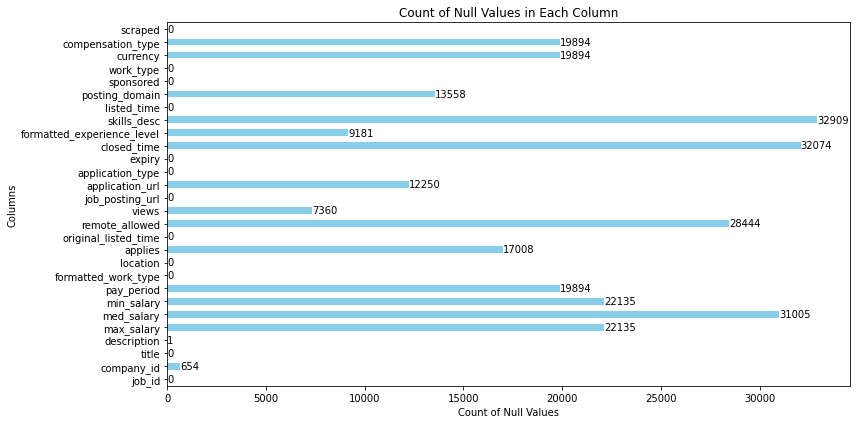

In [15]:
import matplotlib.pyplot as plt

# Get the count of null values in each column
null_counts = data.isnull().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='barh', color='skyblue')

plt.title('Count of Null Values in Each Column')
plt.xlabel('Count of Null Values')
plt.ylabel('Columns')

for i, value in enumerate(null_counts):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()


Let us calculate the null values of some of our candidates to be eliminated, taking into account our diagram. 

In [16]:
null_percentage = (data['applies'].isnull().sum() / len(data)) * 100
print(f"The percentage of null values in the 'applies' column is: {null_percentage:.2f}%")

The percentage of null values in the 'applies' column is: 51.16%


In [17]:
null_percentage = (data['skills_desc'].isnull().sum() / len(data)) * 100
print(f"The percentage of null values in the 'skills_desc' column is: {null_percentage:.2f}%")

The percentage of null values in the 'skills_desc' column is: 98.99%


In the following chart, we will count the types of data we have in our dataset:

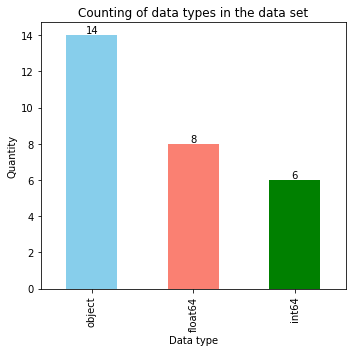

In [18]:
import matplotlib.pyplot as plt

data_types_counts = data.dtypes.value_counts()


colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In the following graph, we can see the number of unique values by columns:

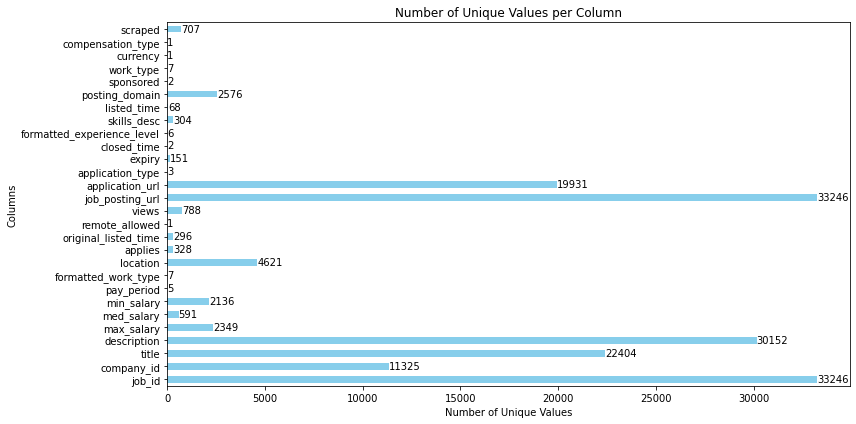

In [19]:
import matplotlib.pyplot as plt


unique_counts = data.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

where we can see that the columns with the most unique values are job_posting_url and job_id, with the total amount of data.

As one of our analytics is to analyze the salary, then below we can see the number of non-null values in each of the 3 columns corresponding to the salary.

In [20]:
max_salary_count = data['max_salary'].count()
med_salary_count = data['med_salary'].count()
min_salary_count = data['min_salary'].count()

# Print the counts
print(f"Number of non-null values in 'max_salary': {max_salary_count}")
print(f"Number of non-null values in 'med_salary': {med_salary_count}")
print(f"Number of non-null values in 'min_salary': {min_salary_count}")

Number of non-null values in 'max_salary': 11111
Number of non-null values in 'med_salary': 2241
Number of non-null values in 'min_salary': 11111


Considering that we have 33246 records in total in our dataset, we will perform a mathematical procedure to calculate an overall average salary for each job.

Going deeper into the data set, we perform an EDA on specific columns. For example, here we have "Distribution of unique values of Pay Periods" and other graphs to study; and this is important when making decisions about our analysis.

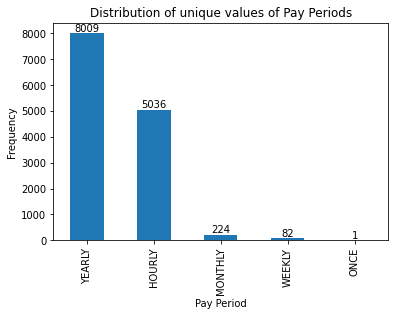

In [21]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "pay_period" column
pay_period_counts = data.pay_period.value_counts()

# Create the bar chart
ax = pay_period_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Pay Periods')
plt.xlabel('Pay Period')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Here we can see that the value of "YEARLY" has most of the other pay periods; this is key, as here we realize that we can standardize the other pay periods to be annual.

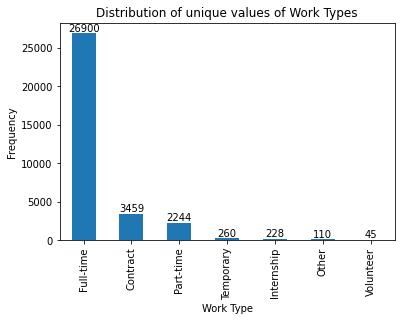

In [22]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "formatted_work_type" column
work_type_counts = data.formatted_work_type.value_counts()

# Create the bar chart
ax = work_type_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Here we can see that the "Full-time" value has most of the other work types; this is key, as here we realize that we can work with full-time jobs as part of our analysis.

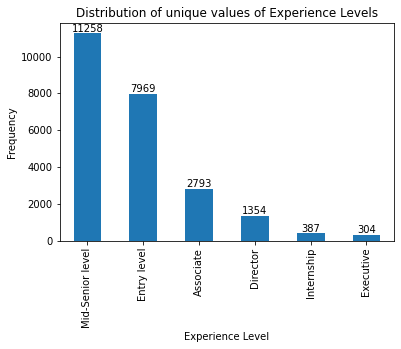

In [23]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "formatted_experience_level" column
experience_level_counts = data.formatted_experience_level.value_counts()

# Create the bar chart
ax = experience_level_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In this graph we do see something more general among all levels of experience; as part of our analysis, we work with everyone.

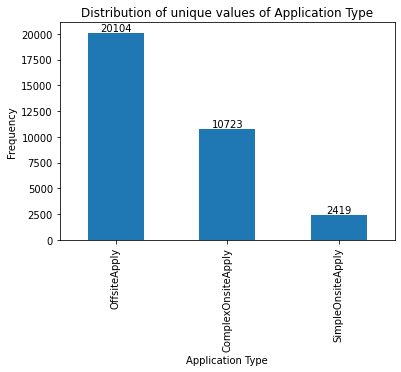

In [24]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "formatted_experience_level" column
experience_level_counts = data.application_type.value_counts()

# Create the bar chart
ax = experience_level_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Application Type')
plt.xlabel('Application Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()

- OffsiteApply: This indicates that the application process is conducted off-site, meaning it typically involves completing an online form, submitting a resume or application via email, or using an online applicant tracking system to apply for a job.

- ComplexOnsiteApply: This type of application involves a phase that takes place on-site at the company's location and may be more detailed or complex compared to an off-site application. This could include face-to-face interviews, technical or skills assessments, problem-solving exercises, among others.

- SimpleOnsiteApply: Similar to ComplexOnsiteApply, but indicates that the on-site application process is simpler and more straightforward. It may involve an in-person interview or a brief meeting with the employer or hiring team, without additional tests or complex evaluations.

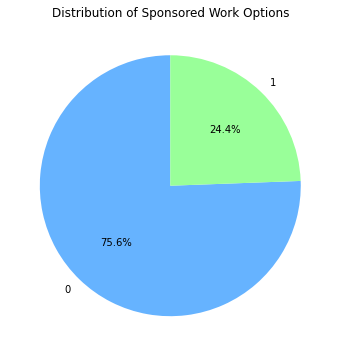

In [25]:
# Distribution of remote work options
sponsored_work_distribution =data['sponsored'].value_counts()

# Plot
plt.figure(figsize=(9, 6))
sponsored_work_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Sponsored Work Options')
plt.ylabel('')
plt.show()

sponsored: Whether the job listing is sponsored or promoted.
Where 0 indicates if it is promoted and 1 if it is sponsored. In this graph we can see that 75.6 % of the works are promoted.


Now we can see the salary payment currency of this dataset:

In [26]:
data.currency.value_counts()

USD    13352
Name: currency, dtype: int64

And values of type Compensation

In [27]:
data.compensation_type.value_counts()

BASE_SALARY    13352
Name: compensation_type, dtype: int64

All salaries provided are only for the base pay and are in USD currency.

#### Now, we will EDA our other two tables: "Industries" and "jobIndustries". This one will be easier, since we have fewer columns.

In [28]:
engine = create_engine(db_connection) 
connection = engine.connect() 

In [29]:
table_name = 'Industries'
Industries_df = pd.read_sql_table(table_name, connection)

Industries_df.head()

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


In [30]:
Industries_df.shape

(229, 2)

This table contains 229 rows and 2 columns.

In [31]:
null_counts = Industries_df.isnull().sum()
null_counts

industry_id       0
industry_name    17
dtype: int64

We can observe only 17 null data in "industry_name" something that will not affect our analysis that much.

In [32]:
table_name = 'JobsIndustries'
JobsIndustries_df = pd.read_sql_table(table_name, connection)

JobsIndustries_df.head()

,job_id,industry_id
0,3378133231,68
1,3497509795,96
2,3690843087,47
3,3691775263,112
4,3691779379,80


In [33]:
JobsIndustries_df.shape

(44091, 2)

This table contains 44091 rows and 2 columns.

In [34]:
null_counts = JobsIndustries_df.isnull().sum()
null_counts

job_id         0
industry_id    0
dtype: int64

We can see that we don't have null values in this table.

## Section #3: MERGE, IMPUTING & STANDARDIZATION

Reviewing our EDA, we can eliminate the following columns: "applies" since we got more than half of null data (51.16%), "original_listed_time", "expiry", "closed_time", and "listed_time" since they do not have an acceptable date format, and we cannot correct that effect.
"application_url", we will remove it because we already have a column called "posting_domain" which gives me the same information. "skill_desc" because we got (98.99%) of null values.
And finally, we will not take into account the column "work_type", because it gives me the same information of the column "formatted_work_type" (it is basically repeated).


In [35]:
keep_columns = ['job_id', 'company_id', 'title', 'description', 'max_salary', 'med_salary', 'min_salary', 'pay_period', 'formatted_work_type', 'location', 'views', 'job_posting_url', 'application_type', 'formatted_experience_level', 'posting_domain', 'sponsored', 'currency', 'compensation_type', 'scraped']

condition_1 = (data['formatted_work_type'] == 'Full-time')
condition_2 = (data['pay_period'].isin (['YEARLY', 'HOURLY', 'MONTHLY', 'WEEKLY']))

jobsPostings_df2 = data.loc[condition_1 & condition_2][keep_columns]
jobsPostings_df2.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",9.0,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,2227.0,NaN,HOURLY,Full-time,"Aliso Viejo, CA",1.0,https://www.linkedin.com/jobs/view/3757938018/...,OffsiteApply,Entry level,jobs.apploi.com,0,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,https://www.linkedin.com/jobs/view/3757937095/...,OffsiteApply,Mid-Senior level,careers.iherb.com,0,USD,BASE_SALARY,1699085346
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",NaN,193.0,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,https://www.linkedin.com/jobs/view/3757936097/...,OffsiteApply,Entry level,jobs.apploi.com,0,USD,BASE_SALARY,1699089324
10,3757932846,10515052.0,Estimator In Training,Company: Gerber Collision & Glass\n\nWELCOME T...,20.0,NaN,14.0,HOURLY,Full-time,"Marietta, GA",2.0,https://www.linkedin.com/jobs/view/3757932846/...,OffsiteApply,Mid-Senior level,boydgroup.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134636


We will join the data with the "Industries_df" to bring in the Industry name for the role based on the job_id and industry_id.

In [36]:
jobsPostings_Industry_df = jobsPostings_df2.merge(JobsIndustries_df, on='job_id')\
.merge(Industries_df, on='industry_id')

jobsPostings_Industry_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,120000.0,NaN,105000.0,YEARLY,Full-time,"Orlando, FL",...,https://www.linkedin.com/jobs/view/3757912704/...,ComplexOnsiteApply,Mid-Senior level,None,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,267.0,NaN,227.0,HOURLY,Full-time,"Brea, CA",...,https://www.linkedin.com/jobs/view/3757912173/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,95900.0,NaN,76500.0,YEARLY,Full-time,"Los Angeles, CA",...,https://www.linkedin.com/jobs/view/3757909542/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,NaN,5250.0,NaN,MONTHLY,Full-time,"Eugene, OR",...,https://www.linkedin.com/jobs/view/3757754488/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing


### Salary standardization

Given that most jobs have provided a salary range (min and max), we will take the two values to create an "average salary" value.

In [37]:
jobsPostings_Industry_df['avg_salary'] = (jobsPostings_Industry_df[['min_salary', 'max_salary']].mean(axis=1))
jobsPostings_Industry_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,avg_salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,NaN
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,120000.0,NaN,105000.0,YEARLY,Full-time,"Orlando, FL",...,ComplexOnsiteApply,Mid-Senior level,None,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,267.0,NaN,227.0,HOURLY,Full-time,"Brea, CA",...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,247.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,95900.0,NaN,76500.0,YEARLY,Full-time,"Los Angeles, CA",...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,NaN,5250.0,NaN,MONTHLY,Full-time,"Eugene, OR",...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,NaN


Combine avg_salary and med_salary in a new Salary column.

In [38]:
jobsPostings_Industry_df['Salary'] = jobsPostings_Industry_df['avg_salary'].combine_first(jobsPostings_Industry_df['med_salary'])

jobsPostings_Industry_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,avg_salary,Salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,NaN,5250.0
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,120000.0,NaN,105000.0,YEARLY,Full-time,"Orlando, FL",...,Mid-Senior level,None,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,267.0,NaN,227.0,HOURLY,Full-time,"Brea, CA",...,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,247.0,247.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,95900.0,NaN,76500.0,YEARLY,Full-time,"Los Angeles, CA",...,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,NaN,5250.0,NaN,MONTHLY,Full-time,"Eugene, OR",...,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,NaN,5250.0


Now, we will delete the columns used for our calculation, which are: 'max_salary', 'med_salary', 'min_salary', 'avg_salary'.

In [39]:
jobsPostings_Industry_df.drop(columns=['max_salary', 'med_salary', 'min_salary', 'avg_salary'], inplace=True)

In [40]:
jobsPostings_Industry_df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,Salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",9.0,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,5250.0
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,YEARLY,Full-time,"Orlando, FL",3.0,https://www.linkedin.com/jobs/view/3757912704/...,ComplexOnsiteApply,Mid-Senior level,None,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,HOURLY,Full-time,"Brea, CA",17.0,https://www.linkedin.com/jobs/view/3757912173/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,247.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,YEARLY,Full-time,"Los Angeles, CA",18.0,https://www.linkedin.com/jobs/view/3757909542/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,MONTHLY,Full-time,"Eugene, OR",2.0,https://www.linkedin.com/jobs/view/3757754488/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,5250.0


Now, what we will do is to standardize salaries on an annual basis.  This means that since we are working with 'YEARLY', 'HOURLY', 'MONTHLY' and 'WEEKLY', what we want to do is to calculate but YEARLY.

In [41]:
def c_annual_salary(row):
    if row['pay_period'] == 'YEARLY':
        return row['Salary']
    elif row['pay_period'] == 'MONTHLY':
        return row['Salary'] * 12 # 12 MONTHS IN A YEAR
    elif row['pay_period'] == 'WEEKLY':
        return row['Salary'] * 52 # 52 WEEKS IN A YEAR
    elif row['pay_period'] == 'HOURLY':
        return row['Salary'] * 2080 # 2,080 HOURS FULL-TIME HOURS IN A YEAR
    else:
        return None

In [42]:
jobsPostings_Industry_df['annual_salary'] = jobsPostings_Industry_df.apply(c_annual_salary, axis = 1)
jobsPostings_Industry_df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,Salary,annual_salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",9.0,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,5250.0,63000.0
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,YEARLY,Full-time,"Orlando, FL",3.0,https://www.linkedin.com/jobs/view/3757912704/...,ComplexOnsiteApply,Mid-Senior level,None,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,HOURLY,Full-time,"Brea, CA",17.0,https://www.linkedin.com/jobs/view/3757912173/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,247.0,513760.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,YEARLY,Full-time,"Los Angeles, CA",18.0,https://www.linkedin.com/jobs/view/3757909542/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,MONTHLY,Full-time,"Eugene, OR",2.0,https://www.linkedin.com/jobs/view/3757754488/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,5250.0,63000.0


Now, we will delete the columns "pay_period" and "Salary", since we have already generated our new column with the information contained in both columns.

In [43]:
jobsPostings_Industry_df.drop(columns=['pay_period', 'Salary'], inplace=True)

In [44]:
jobsPostings_Industry_df.head()

,job_id,company_id,title,description,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,annual_salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,Full-time,"Little River, SC",9.0,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,63000.0
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,Full-time,"Orlando, FL",3.0,https://www.linkedin.com/jobs/view/3757912704/...,ComplexOnsiteApply,Mid-Senior level,None,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,Full-time,"Brea, CA",17.0,https://www.linkedin.com/jobs/view/3757912173/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,513760.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,Full-time,"Los Angeles, CA",18.0,https://www.linkedin.com/jobs/view/3757909542/...,OffsiteApply,None,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,Full-time,"Eugene, OR",2.0,https://www.linkedin.com/jobs/view/3757754488/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,63000.0


This is already a table we could work with, but, let's do a little EDA to check its missing values and so on to see what other procedure can be done to it.

In [45]:
jobsPostings_Industry_df.shape

(15458, 18)

By performing this procedure, we are left with 15458 rows and 18 columns for our analysis.

In [46]:
null_counts = jobsPostings_Industry_df.isnull().sum()
null_counts

job_id                           0
company_id                      83
title                            0
description                      0
formatted_work_type              0
location                         0
views                         2582
job_posting_url                  0
application_type                 0
formatted_experience_level    4117
posting_domain                6588
sponsored                        0
currency                         0
compensation_type                0
scraped                          0
industry_id                      0
industry_name                   10
annual_salary                    0
dtype: int64

Well, reviewing our new table, we realize that the columns that have null values are: "company_id" with 83 null values, "views" with 2582 null values, "formatted_experience_level" with 4117 null values, "posting_domain" with 6588 null values and "industry_name" with 10 null values.

Considering the above, we have decided to impute the value "-1" to "company_id" and "views"; and to impute the phrase "not Specified" to "formatted_experience_level" and "posting_domain".
In the case of industry_name, we have decided to impute "not Specified" and it will be easier since we only have 10 null values.

In [47]:
# Impute "-1" to the company_id and views columns
jobsPostings_Industry_df['company_id'].fillna(-1, inplace=True)
jobsPostings_Industry_df['views'].fillna(-1, inplace=True)

# Impute with "Not Specified" to formatted_experience_level missing values
jobsPostings_Industry_df['formatted_experience_level'].fillna('Not specified', inplace=True)
# Impute with "Not Specified" to industry_name missing values
jobsPostings_Industry_df['industry_name'].fillna('Not specified', inplace=True)

# Impute with "Not Specified" to posting_domain missing values
jobsPostings_Industry_df['posting_domain'].fillna('Not specified', inplace=True)

# Show the updated DataFrame
print(jobsPostings_Industry_df)

           job_id  company_id  \
0      3757940104    553718.0   
1      3757912704      8058.0   
2      3757912173   3257923.0   
3      3757909542    117893.0   
4      3757754488    553718.0   
...           ...         ...   
15453  3693045025  10155672.0   
15454  3693586570    162448.0   
15455  3693580926    162448.0   
15456  3693073585      5235.0   
15457  3693047968      5968.0   

                                                   title  \
0                                  Hearing Care Provider   
1                           Medical Sales Representative   
2                         Regulatory Affairs Coordinator   
3      Implant Direct Regional Sales Representative (...   
4                               Patient Care Coordinator   
...                                                  ...   
15453         Licensed Child Care Lead Preschool Teacher   
15454         Project Controls Mgr - 90359320 - New York   
15455    Electrician Journeyman - 90220311 - Beech Grove   
154

Now, we print our final table:

In [48]:
jobsPostings_Industry_df.head()

,job_id,company_id,title,description,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,annual_salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,Full-time,"Little River, SC",9.0,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,63000.0
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,Full-time,"Orlando, FL",3.0,https://www.linkedin.com/jobs/view/3757912704/...,ComplexOnsiteApply,Mid-Senior level,Not specified,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,Full-time,"Brea, CA",17.0,https://www.linkedin.com/jobs/view/3757912173/...,OffsiteApply,Not specified,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,513760.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,Full-time,"Los Angeles, CA",18.0,https://www.linkedin.com/jobs/view/3757909542/...,OffsiteApply,Not specified,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,Full-time,"Eugene, OR",2.0,https://www.linkedin.com/jobs/view/3757754488/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,63000.0


We check for null values:

In [49]:
null_counts = jobsPostings_Industry_df.isnull().sum()
null_counts

job_id                        0
company_id                    0
title                         0
description                   0
formatted_work_type           0
location                      0
views                         0
job_posting_url               0
application_type              0
formatted_experience_level    0
posting_domain                0
sponsored                     0
currency                      0
compensation_type             0
scraped                       0
industry_id                   0
industry_name                 0
annual_salary                 0
dtype: int64

## Section #4: Creation of the new table in postgreSQL.

In [50]:
Session = sessionmaker(bind=engine)
session = Session()

Base = declarative_base()

class JobsNew(Base):
    __tablename__ = 'jobsLinkedinSalary'
    id = Column(Integer, primary_key=True, autoincrement=True)
    job_id = Column(Integer, nullable=False)
    company_id = Column(String(100), nullable=False)
    title = Column(String(100), nullable=False)
    description = Column(String(200), nullable=False)
    formatted_work_type = Column(String(100), nullable=False)
    location = Column(String(100), nullable=False)
    views = Column(Integer, nullable=False)
    job_posting_url = Column(String(100), nullable=False)
    application_type = Column(String(100), nullable=False)
    formatted_experience_level = Column(String(100), nullable=False)
    sponsored = Column(Boolean, nullable=False)
    work_type = Column(String(100), nullable=False)
    currency = Column(CHAR(3), nullable=False)
    compensation_type = Column(String(100), nullable=False)
    industry_id = Column(Integer, nullable=False)
    industry_name = Column(String(100), nullable=False)
    annual_salary = Column(Integer, nullable=False)

Base.metadata.create_all(engine)
JobsNew.__table__

print("Table created")

Table created


Now, we will pass the data from our dataframe to the new table created in PostgreSQL.

In [52]:
jobsPostings_Industry_df.to_sql('jobsLinkedinSalary', engine, if_exists='replace', index=False)
print("Data inserted")

Data inserted


Now, let's read our postgress table

In [53]:
engine = create_engine(db_connection) #We create a SQLAlchemy engine to connect to the database
connection = engine.connect() #We connect to the database
table_name = 'jobsLinkedinSalary'  
df = pd.read_sql_table(table_name, connection) #We read the table into a pandas dataframe
LinkedinSalary=df

In [54]:
LinkedinSalary.head()

,job_id,company_id,title,description,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,annual_salary
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,Full-time,"Little River, SC",9.0,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699138101,17,Medical Equipment Manufacturing,63000.0
1,3757912704,8058.0,Medical Sales Representative,-Join this very reputable healthcare manufactu...,Full-time,"Orlando, FL",3.0,https://www.linkedin.com/jobs/view/3757912704/...,ComplexOnsiteApply,Mid-Senior level,Not specified,0,USD,BASE_SALARY,1699080458,17,Medical Equipment Manufacturing,112500.0
2,3757912173,3257923.0,Regulatory Affairs Coordinator,Job Description\n\nThe Regulatory Affairs Coor...,Full-time,"Brea, CA",17.0,https://www.linkedin.com/jobs/view/3757912173/...,OffsiteApply,Not specified,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699134861,17,Medical Equipment Manufacturing,513760.0
3,3757909542,117893.0,Implant Direct Regional Sales Representative (...,Job Description\n\nAs a valuable member of a c...,Full-time,"Los Angeles, CA",18.0,https://www.linkedin.com/jobs/view/3757909542/...,OffsiteApply,Not specified,envista.wd1.myworkdayjobs.com,0,USD,BASE_SALARY,1699137801,17,Medical Equipment Manufacturing,86200.0
4,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,Full-time,"Eugene, OR",2.0,https://www.linkedin.com/jobs/view/3757754488/...,OffsiteApply,Entry level,careers-demant.icims.com,0,USD,BASE_SALARY,1699131481,17,Medical Equipment Manufacturing,63000.0


In [55]:
LinkedinSalary.nunique()


job_id                        11057
company_id                     4533
title                          7867
description                    9972
formatted_work_type               1
location                       2311
views                           582
job_posting_url               11057
application_type                  3
formatted_experience_level        7
posting_domain                 1249
sponsored                         2
currency                          1
compensation_type                 1
scraped                         705
industry_id                     200
industry_name                   193
annual_salary                  2932
dtype: int64

In [56]:
# Ver cantidad valores duplicados en title

duplicates = LinkedinSalary.duplicated(subset=['title'], keep=False)
duplicates.sum()




10430

In [57]:
# Ver las filas con mismo title

duplicates = LinkedinSalary.duplicated(subset=['title'], keep=False)
LinkedinSalary[duplicates].sort_values('title')


,job_id,company_id,title,description,formatted_work_type,location,views,job_posting_url,application_type,formatted_experience_level,posting_domain,sponsored,currency,compensation_type,scraped,industry_id,industry_name,annual_salary
3458,3693056081,89866895.0,Account Manager,We are looking for a professional and courteou...,Full-time,"Omaha, NE",26.0,https://www.linkedin.com/jobs/view/3693056081/...,ComplexOnsiteApply,Entry level,Not specified,1,USD,BASE_SALARY,1,47,Accounting,43680.0
3050,3693056081,89866895.0,Account Manager,We are looking for a professional and courteou...,Full-time,"Omaha, NE",26.0,https://www.linkedin.com/jobs/view/3693056081/...,ComplexOnsiteApply,Entry level,Not specified,1,USD,BASE_SALARY,1,80,Advertising Services,43680.0
835,3693056081,89866895.0,Account Manager,We are looking for a professional and courteou...,Full-time,"Omaha, NE",26.0,https://www.linkedin.com/jobs/view/3693056081/...,ComplexOnsiteApply,Entry level,Not specified,1,USD,BASE_SALARY,1,27,Retail,43680.0
10670,3757483817,35576936.0,Airport Senior Project Manager – Large Termin...,Job Title: Senior Project Manager – Terminal 9...,Full-time,Los Angeles Metropolitan Area,11.0,https://www.linkedin.com/jobs/view/3757483817/...,ComplexOnsiteApply,Not specified,Not specified,1,USD,BASE_SALARY,1699046474,51,Civil Engineering,215000.0
7192,3757483817,35576936.0,Airport Senior Project Manager – Large Termin...,Job Title: Senior Project Manager – Terminal 9...,Full-time,Los Angeles Metropolitan Area,11.0,https://www.linkedin.com/jobs/view/3757483817/...,ComplexOnsiteApply,Not specified,Not specified,1,USD,BASE_SALARY,1699046474,48,Construction,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,3757496078,7043.0,in-house Contracting Counsel (junior-mid level...,Manufacturing company seeking an admitted atto...,Full-time,"Hartford County, CT",65.0,https://www.linkedin.com/jobs/view/3757496078/...,ComplexOnsiteApply,Mid-Senior level,Not specified,0,USD,BASE_SALARY,1699135622,48,Construction,135000.0
897,3757496078,7043.0,in-house Contracting Counsel (junior-mid level...,Manufacturing company seeking an admitted atto...,Full-time,"Hartford County, CT",65.0,https://www.linkedin.com/jobs/view/3757496078/...,ComplexOnsiteApply,Mid-Senior level,Not specified,0,USD,BASE_SALARY,1699135622,25,Manufacturing,135000.0
1502,3697388054,1703.0,"tech 1, Installation",R369619\n\nComcast brings together the best in...,Full-time,"Groton, CT",1.0,https://www.linkedin.com/jobs/view/3697388054/...,OffsiteApply,Not specified,comcast.contacthr.com,0,USD,BASE_SALARY,1,6,"Technology, Information and Internet",376480.0
8955,3697388054,1703.0,"tech 1, Installation",R369619\n\nComcast brings together the best in...,Full-time,"Groton, CT",1.0,https://www.linkedin.com/jobs/view/3697388054/...,OffsiteApply,Not specified,comcast.contacthr.com,0,USD,BASE_SALARY,1,8,Telecommunications,376480.0


In [65]:
import requests

url = "https://job-salary-data.p.rapidapi.com/job-salary"

querystring = {
    "job_title": "Account Manager",
    "location": "new york, usa",
    "experience_level": "Mid-Senior level",
    "radius": "200"
}
headers = {
    "X-RapidAPI-Key": "39b4c93379msh9c7dd97283c55cep156095jsnf4965496880e",
    "X-RapidAPI-Host": "job-salary-data.p.rapidapi.com"
}

try:
    response = requests.request("GET", url, headers=headers, params=querystring)
    print(response.json())
except Exception as error:
    print(error)

{'status': 'OK', 'request_id': 'ab0dedc5-dbf4-48f7-969e-d2c411d316fa', 'data': [{'location': 'New York, NY', 'job_title': 'Account Manager', 'publisher_name': 'Built In NYC', 'publisher_link': 'https://www.builtinnyc.com/salaries/sales/account-manager/new-york', 'min_salary': 50000, 'max_salary': 231720, 'median_salary': 91000, 'salary_period': 'YEAR', 'salary_currency': 'USD'}, {'location': 'New York, NY', 'job_title': 'Account Manager', 'publisher_name': 'Glassdoor', 'publisher_link': 'https://www.glassdoor.com/Salary/Google-Account-Manager-New-York-City-Salaries-EJI_IE9079.0,6_KO7,22_IL.23,36_IM615.htm', 'min_salary': 97185, 'max_salary': 167532, 'median_salary': 127599, 'salary_period': 'YEAR', 'salary_currency': 'USD'}, {'location': 'New York, NY', 'job_title': 'Account Manager', 'publisher_name': 'Indeed', 'publisher_link': 'https://www.indeed.com/cmp/Indeed/salaries/Account-Manager/New-York-NY', 'min_salary': 70817.45, 'max_salary': 120203.5, 'median_salary': 92263.24, 'salary_p